## Finalidade da aplicação

O objetivo é achar o melhor modelo para poder prever o consumo de cerveja com os atributos existentes no dataset.

Os o conjunto de dados foi retirado do Kaggle( https://www.kaggle.com/datasets/dongeorge/beer-consumption-sao-paulo).



*Descrição*

*Os dados (amostra) foram coletados em São Paulo — Brasil, em uma área universitária, onde existem algumas festas com grupos de estudantes de 18 a 28 anos (média). O conjunto de dados utilizado para esta atividade possui 7 atributos, sendo um Target, com período de um ano.*

In [38]:
# Importando bibliotecas necessárias para a análise

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
# Importando funções necessárias para criação de modelos de predição

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [40]:
# Armazenando o caminho do arquivo na variável path_file

path_file = '/content/drive/MyDrive/AgroAdvance/Semana 17 - Classificação supervisionada/Consumo_cerveja.csv'

In [41]:
# Carregando o arquivo 'Consumo_cerveja.csv' e o visualizando em forma de DataFrame (tabela)

dataset = pd.read_csv(path_file)
dataset

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,"27,3","23,9","32,5",0,0.0,25.461
1,2015-01-02,"27,02","24,5","33,5",0,0.0,28.972
2,2015-01-03,"24,82","22,4","29,9",0,1.0,30.814
3,2015-01-04,"23,98","21,5","28,6","1,2",1.0,29.799
4,2015-01-05,"23,82",21,"28,3",0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
# Entendendo melhor os dados com a função .info()

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    object 
 2   Temperatura Minima (C)       365 non-null    object 
 3   Temperatura Maxima (C)       365 non-null    object 
 4   Precipitacao (mm)            365 non-null    object 
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    float64
dtypes: float64(2), object(5)
memory usage: 51.6+ KB


📍Alguns campos(colunas) estão no formato object, porém precisaremos transformá-los em um tipo numérico para trabalharmos com esses dados.
Por padrão, o separador default da função pd.read_csv é o ponto ('.'). Então, vamos redefinir o parâmetro 'decimal' para vírgula (',') com o intuito dos dados serem alterados para tipo como float.

In [43]:
dataset = pd.read_csv(path_file, decimal=',')
dataset

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900
...,...,...,...,...,...,...,...
936,NaN,NaN,NaN,NaN,NaN,NaN,NaN
937,NaN,NaN,NaN,NaN,NaN,NaN,NaN
938,NaN,NaN,NaN,NaN,NaN,NaN,NaN
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Data                         365 non-null    object 
 1   Temperatura Media (C)        365 non-null    float64
 2   Temperatura Minima (C)       365 non-null    float64
 3   Temperatura Maxima (C)       365 non-null    float64
 4   Precipitacao (mm)            365 non-null    float64
 5   Final de Semana              365 non-null    float64
 6   Consumo de cerveja (litros)  365 non-null    object 
dtypes: float64(5), object(2)
memory usage: 51.6+ KB


❗
Ainda ficaram faltando as colunas 'Data' e 'Consumo de cerveja (litros)' para serem transformadas e um tipo Date e float respectivamente.

In [45]:
# Transformando o tipo da coluna Data em datatime
dataset['Data'] = pd.to_datetime(dataset['Data'])

In [46]:
# Transformando o tipo da coluna Consumo de cerveja em float
dataset['Consumo de cerveja (litros)'] = dataset['Consumo de cerveja (litros)'].astype('float')

In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Data                         365 non-null    datetime64[ns]
 1   Temperatura Media (C)        365 non-null    float64       
 2   Temperatura Minima (C)       365 non-null    float64       
 3   Temperatura Maxima (C)       365 non-null    float64       
 4   Precipitacao (mm)            365 non-null    float64       
 5   Final de Semana              365 non-null    float64       
 6   Consumo de cerveja (litros)  365 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 51.6 KB


In [48]:
# Verificando os primeiros registros (linhas) da tabela
dataset.head()

,Data,Temperatura Media (C),Temperatura Minima (C),Temperatura Maxima (C),Precipitacao (mm),Final de Semana,Consumo de cerveja (litros)
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900


In [49]:
# Verificando os nomes das colunas do DataFrame
dataset.columns

Index(['Data', 'Temperatura Media (C)', 'Temperatura Minima (C)',
       'Temperatura Maxima (C)', 'Precipitacao (mm)', 'Final de Semana',
       'Consumo de cerveja (litros)'],
      dtype='object')

In [50]:
# Alterando os nomes das colunas
dataset.columns = ['data', 'temp_media', 'temp_min', 'temp_max', 'precipitacao', 'fds', 'consumo_cerveja']
dataset.columns

Index(['data', 'temp_media', 'temp_min', 'temp_max', 'precipitacao', 'fds',
       'consumo_cerveja'],
      dtype='object')

In [51]:
# Adicionando colunas com dados referente oo ano, mês e dia da semana
dataset['ano'] = dataset['data'].dt.year
dataset['mes'] = dataset['data'].dt.month
dataset['dia_semana'] = dataset['data'].dt.weekday

In [52]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941 entries, 0 to 940
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             365 non-null    datetime64[ns]
 1   temp_media       365 non-null    float64       
 2   temp_min         365 non-null    float64       
 3   temp_max         365 non-null    float64       
 4   precipitacao     365 non-null    float64       
 5   fds              365 non-null    float64       
 6   consumo_cerveja  365 non-null    float64       
 7   ano              365 non-null    float64       
 8   mes              365 non-null    float64       
 9   dia_semana       365 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 73.6 KB


❗❗❗
Verificamos também que há uma grande quantidade de registros (linhas) com valores nulos conforme é mostrado nas informações do dataset. Vamos removê-las.

In [53]:
# Removendo as linhas que tenham todos os campos nulos com a função .dropna e parâmetro how='all'

dataset.dropna(how='all', # Somente linhas que tenham todos campos nulos
               inplace=True # Fazer alteração definitiva
    )

In [54]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365 entries, 0 to 364
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   data             365 non-null    datetime64[ns]
 1   temp_media       365 non-null    float64       
 2   temp_min         365 non-null    float64       
 3   temp_max         365 non-null    float64       
 4   precipitacao     365 non-null    float64       
 5   fds              365 non-null    float64       
 6   consumo_cerveja  365 non-null    float64       
 7   ano              365 non-null    float64       
 8   mes              365 non-null    float64       
 9   dia_semana       365 non-null    float64       
dtypes: datetime64[ns](1), float64(9)
memory usage: 31.4 KB


In [55]:
# Confirmando se ainda temos algum registro com dados nulos
dataset.isnull().any()

data               False
temp_media         False
temp_min           False
temp_max           False
precipitacao       False
fds                False
consumo_cerveja    False
ano                False
mes                False
dia_semana         False
dtype: bool

In [56]:
# Verificando se temos linhas duplicadas
dataset.duplicated().any()

False

In [57]:
dataset.head()

,data,temp_media,temp_min,temp_max,precipitacao,fds,consumo_cerveja,ano,mes,dia_semana
0,2015-01-01,27.30,23.9,32.5,0.0,0.0,25.461,2015.0,1.0,3.0
1,2015-01-02,27.02,24.5,33.5,0.0,0.0,28.972,2015.0,1.0,4.0
2,2015-01-03,24.82,22.4,29.9,0.0,1.0,30.814,2015.0,1.0,5.0
3,2015-01-04,23.98,21.5,28.6,1.2,1.0,29.799,2015.0,1.0,6.0
4,2015-01-05,23.82,21.0,28.3,0.0,0.0,28.900,2015.0,1.0,0.0


In [58]:
# Reorganizando a ordem das colunas
dataset.columns.to_list()

['data',
 'temp_media',
 'temp_min',
 'temp_max',
 'precipitacao',
 'fds',
 'consumo_cerveja',
 'ano',
 'mes',
 'dia_semana']

In [59]:
dataset = dataset[[
    'data',
    'ano',
    'mes',
    'dia_semana',
    'fds',
    'temp_min',
    'temp_media',
    'temp_max',
    'precipitacao',
    'consumo_cerveja'
]]

In [60]:
dataset.head()

,data,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,precipitacao,consumo_cerveja
0,2015-01-01,2015.0,1.0,3.0,0.0,23.9,27.30,32.5,0.0,25.461
1,2015-01-02,2015.0,1.0,4.0,0.0,24.5,27.02,33.5,0.0,28.972
2,2015-01-03,2015.0,1.0,5.0,1.0,22.4,24.82,29.9,0.0,30.814
3,2015-01-04,2015.0,1.0,6.0,1.0,21.5,23.98,28.6,1.2,29.799
4,2015-01-05,2015.0,1.0,0.0,0.0,21.0,23.82,28.3,0.0,28.900


In [61]:
# Vamos verificar algumas informações estatíticos dos dados
dataset.describe()

,data,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,precipitacao,consumo_cerveja
count,365,365.0,365.000000,365.0,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,2015-07-02 00:00:00,2015.0,6.526027,3.0,0.284932,17.461370,21.226356,26.611507,5.196712,25.401367
min,2015-01-01 00:00:00,2015.0,1.000000,0.0,0.000000,10.600000,12.900000,14.500000,0.000000,14.343000
25%,2015-04-02 00:00:00,2015.0,4.000000,1.0,0.000000,15.300000,19.020000,23.800000,0.000000,22.008000
50%,2015-07-02 00:00:00,2015.0,7.000000,3.0,0.000000,17.900000,21.380000,26.900000,0.000000,24.867000
75%,2015-10-01 00:00:00,2015.0,10.000000,5.0,1.000000,19.600000,23.280000,29.400000,3.200000,28.631000
max,2015-12-31 00:00:00,2015.0,12.000000,6.0,1.000000,24.500000,28.860000,36.500000,94.800000,37.937000
std,NaN,0.0,3.452584,2.0,0.452001,2.826185,3.180108,4.317366,12.417844,4.399143


☔

Como os dados da coluna precipitacao têm pouca variação em termos núméricos, vamos montar uma função que simplifica o volume de chuva em choveu (1) ou não choveu (0). Definindo o volume de chuva maior ou igual a 5 como choveu e menor que 5 não choveu.

In [62]:
# Criando a função 'choveu' para retornar se choveu ou não conforme critérios explicados acima

def choveu(volume_chuva):
    if volume_chuva >= 5:
        return 1
    else:
        return 0

In [63]:
# Criando coluna 'choveu' através dos retornos da função acima aplicadas nos dados de precipitacao

dataset['choveu'] = dataset['precipitacao'].apply(choveu)

<ipython-input-63-622557ca42db>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['choveu'] = dataset['precipitacao'].apply(choveu)


In [64]:
dataset.head()

,data,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,precipitacao,consumo_cerveja,choveu
0,2015-01-01,2015.0,1.0,3.0,0.0,23.9,27.30,32.5,0.0,25.461,0
1,2015-01-02,2015.0,1.0,4.0,0.0,24.5,27.02,33.5,0.0,28.972,0
2,2015-01-03,2015.0,1.0,5.0,1.0,22.4,24.82,29.9,0.0,30.814,0
3,2015-01-04,2015.0,1.0,6.0,1.0,21.5,23.98,28.6,1.2,29.799,0
4,2015-01-05,2015.0,1.0,0.0,0.0,21.0,23.82,28.3,0.0,28.900,0


In [65]:
# Selecionando apenas os campos mais relevantes para fazermos uma visualização das correlção com a biblioteca Seaborn
dataset_view = dataset[[
                    'mes',
                    'dia_semana',
                    'fds',
                    'temp_min',
                    'temp_media',
                    'temp_max',
                    'precipitacao',
                    'consumo_cerveja',
                    'choveu']]
dataset_view

,mes,dia_semana,fds,temp_min,temp_media,temp_max,precipitacao,consumo_cerveja,choveu
0,1.0,3.0,0.0,23.9,27.30,32.5,0.0,25.461,0
1,1.0,4.0,0.0,24.5,27.02,33.5,0.0,28.972,0
2,1.0,5.0,1.0,22.4,24.82,29.9,0.0,30.814,0
3,1.0,6.0,1.0,21.5,23.98,28.6,1.2,29.799,0
4,1.0,0.0,0.0,21.0,23.82,28.3,0.0,28.900,0
...,...,...,...,...,...,...,...,...,...
360,12.0,6.0,1.0,21.1,24.00,28.2,13.6,32.307,1
361,12.0,0.0,0.0,21.1,22.64,26.7,0.0,26.095,0
362,12.0,1.0,0.0,20.3,21.68,24.1,10.3,22.309,1
363,12.0,2.0,0.0,19.3,21.38,22.4,6.3,20.467,1


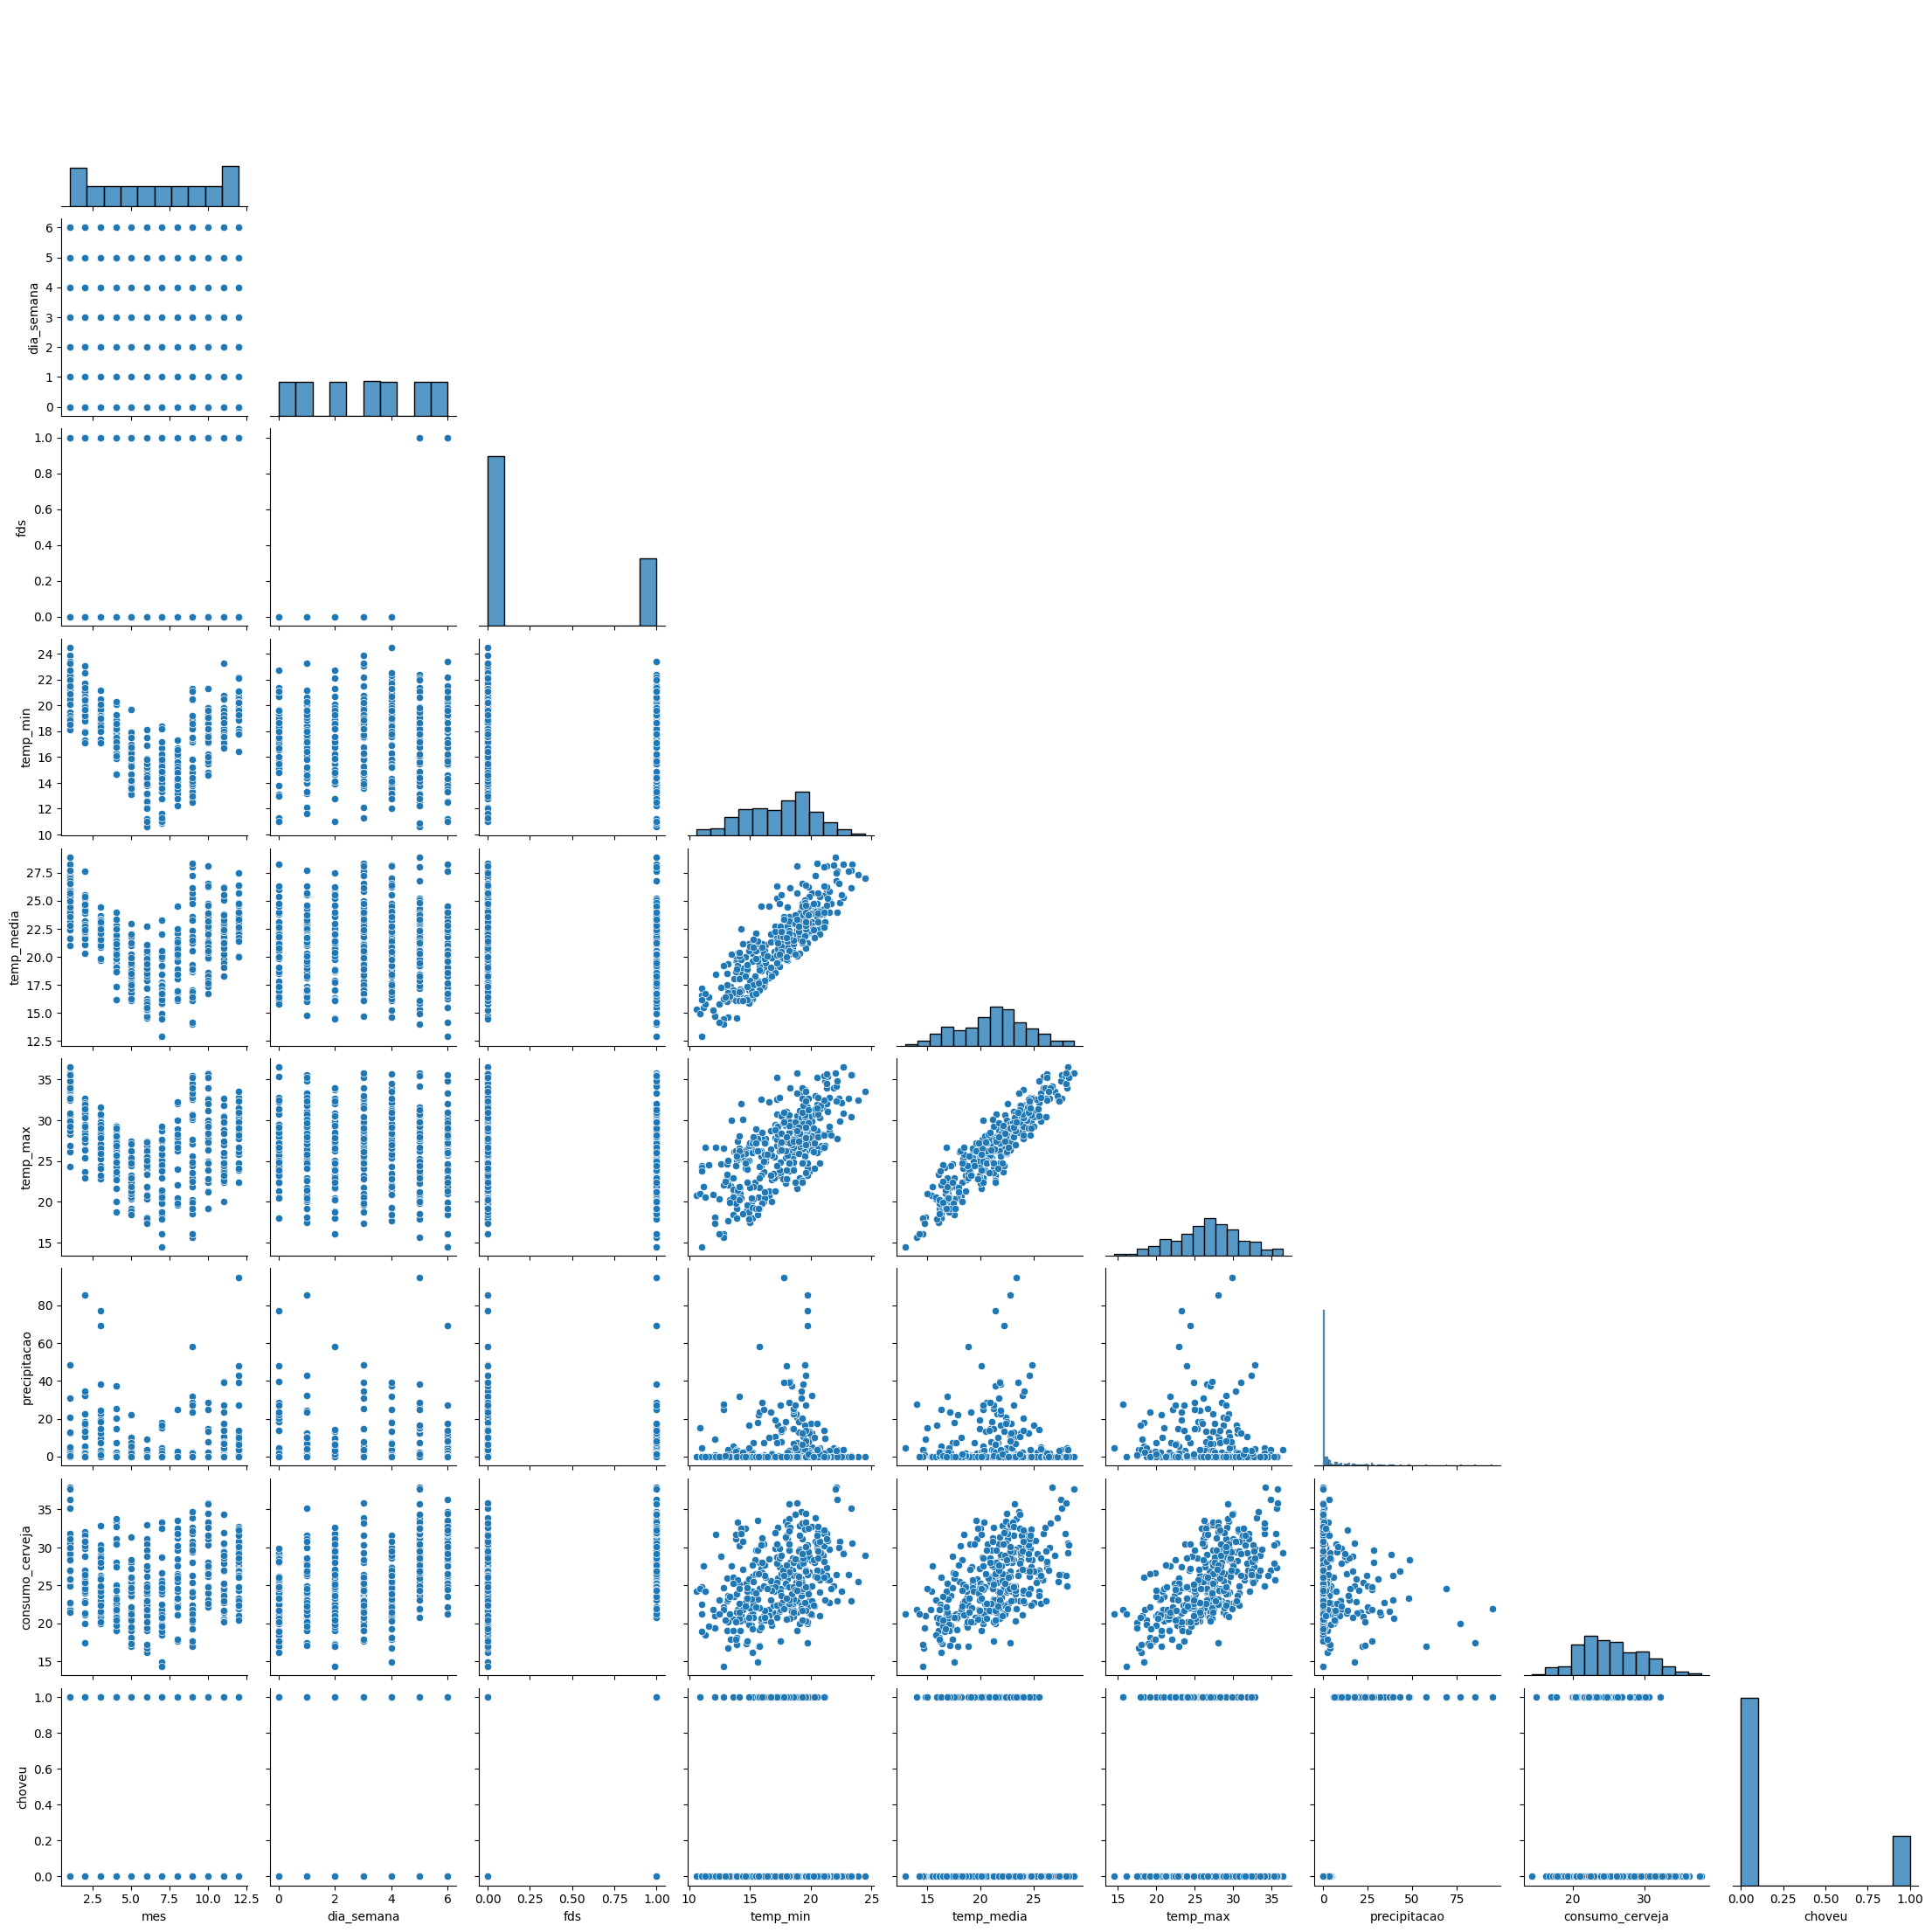

In [66]:
# Visualizando as correlações através de gráficos de dispersão

sns.pairplot(dataset_view, corner=True);

Olhando os gráficos acima, conseguimos ver que os atributos 'temp_max' e 'dia_semana' são os que têm uma correção mais forte com o consumo de cerveja.

:

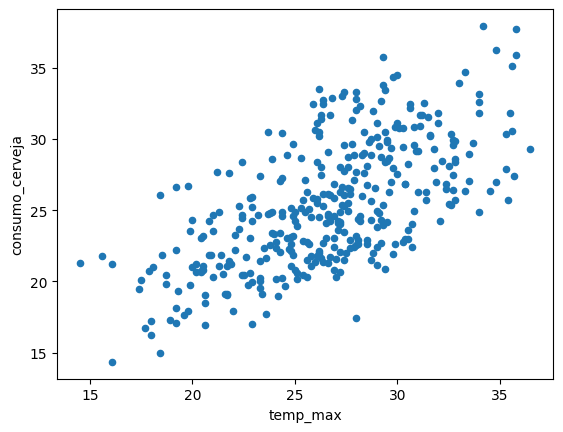

In [67]:
# Visualizando os atributos 'temp_max' e 'consumo_cerveja'
dataset.plot(kind='scatter',
             x='temp_max',
             y='consumo_cerveja');

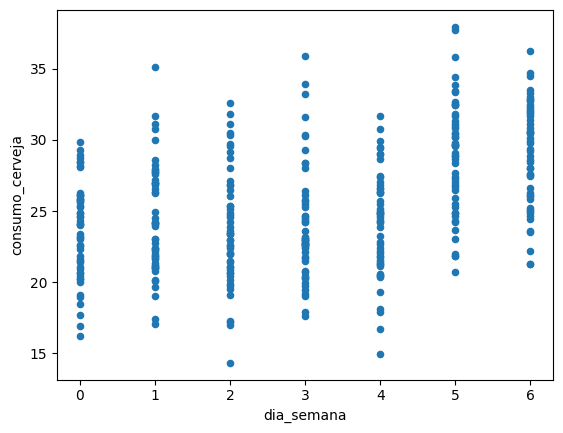

In [71]:
# Visualizando os atributos 'dia_semana' e 'consumo_cerveja'
dataset.plot(kind='scatter',
             x='dia_semana',
             y='consumo_cerveja');

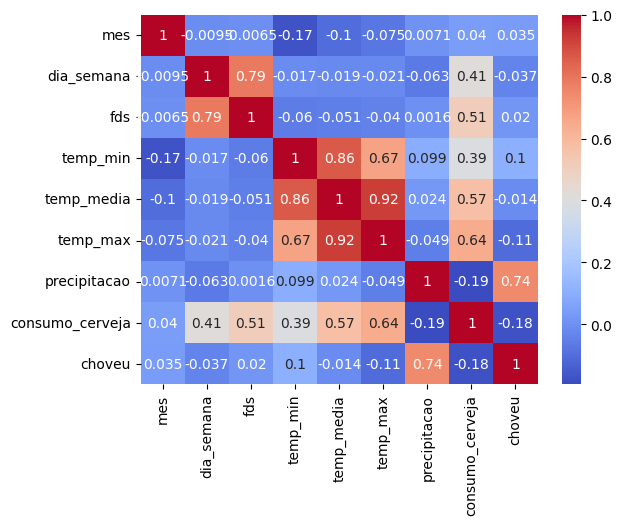

In [74]:
sns.heatmap(dataset_view.corr(), annot=True, cmap='coolwarm');

In [86]:
# Criando modelos de regressão

modelo1 = LinearRegression(fit_intercept=False) # com intercept = 0
modelo_chuva1 = LinearRegression(fit_intercept=False) # com intercept = 0
modelo2 = LinearRegression()
modelo_chuva2 = LinearRegression()

In [76]:
# Definindo os atributos
atributos = dataset[['fds', 'temp_max']]
atributos_com_chuva = dataset[['fds', 'temp_max', 'precipitacao']]

In [77]:
# Definindo rótulos
rotulo = dataset['consumo_cerveja'].to_frame()

In [78]:
# Passando padronizadores para os modelos

modelo1 = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo1)
])

modelo_chuva1 = Pipeline([
    ('padronizador', StandardScaler()),
     ('regressao_linear', modelo_chuva1)])

modelo2 = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo2)
])

modelo_chuva2 = Pipeline([
    ('padronizador', StandardScaler()),
    ('regressao_linear', modelo_chuva2)
])

In [79]:
# Treinamento de modelos
modelo1.fit(atributos, rotulo)
modelo_chuva1.fit(atributos_com_chuva, rotulo)
modelo2.fit(atributos, rotulo)
modelo_chuva2.fit(atributos_com_chuva, rotulo)

Pipeline(steps=[('padronizador', StandardScaler()),
                ('regressao_linear', LinearRegression())])

In [80]:
# Adicionando colunas com os valores gerados pelos modelos

dataset['modelo1'] = modelo1.predict(atributos)
dataset['modelo_chuva1'] = modelo_chuva1.predict(atributos_com_chuva)
dataset['modelo2'] = modelo2.predict(atributos)
dataset['modelo_chuva2'] = modelo_chuva2.predict(atributos_com_chuva)

<ipython-input-80-6fd1568a9d3e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['modelo1'] = modelo1.predict(atributos)
<ipython-input-80-6fd1568a9d3e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['modelo_chuva1'] = modelo_chuva1.predict(atributos_com_chuva)
<ipython-input-80-6fd1568a9d3e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pa

In [87]:
dataset

,data,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,precipitacao,consumo_cerveja,choveu,modelo1,modelo_chuva1,modelo2,modelo_chuva2,erro_modelo1,erro_modelo_chuva1,erro_modelo2,erro_modelo_chuva2
0,2015-01-01,2015.0,1.0,3.0,0.0,23.9,27.30,32.5,0.0,25.461,0,2.507444,2.758355,27.908811,28.159722,526.865722,515.410089,5.991780,7.283101
1,2015-01-02,2015.0,1.0,4.0,0.0,24.5,27.02,33.5,0.0,28.972,0,3.184142,3.426898,28.585509,28.828265,665.013602,652.552252,0.149375,0.020660
2,2015-01-03,2015.0,1.0,5.0,1.0,22.4,24.82,29.9,0.0,30.814,0,5.932742,6.204227,31.334109,31.605594,619.077013,605.640939,0.270513,0.626621
3,2015-01-04,2015.0,1.0,6.0,1.0,21.5,23.98,28.6,1.2,29.799,0,5.053034,5.266134,30.454401,30.667501,612.362824,601.861499,0.429551,0.754295
4,2015-01-05,2015.0,1.0,0.0,0.0,21.0,23.82,28.3,0.0,28.900,0,-0.334688,-0.049524,25.066679,25.351843,854.666973,838.074952,14.694348,12.589419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015.0,12.0,6.0,1.0,21.1,24.00,28.2,13.6,32.307,1,4.782355,4.285852,30.183722,29.687219,757.606086,785.184744,4.508309,6.863253
361,2015-12-28,2015.0,12.0,0.0,0.0,21.1,22.64,26.7,0.0,26.095,0,-1.417405,-1.119192,23.983962,24.282175,756.932419,740.612273,4.456480,3.286336
362,2015-12-29,2015.0,12.0,1.0,0.0,20.3,21.68,24.1,10.3,22.309,1,-3.176820,-3.449542,22.224547,21.951825,649.527017,663.502468,0.007132,0.127574
363,2015-12-30,2015.0,12.0,2.0,0.0,19.3,21.38,22.4,6.3,20.467,1,-4.327207,-4.356108,21.074160,21.045260,614.752686,616.186672,0.368644,0.334384


In [82]:
# Calculando a diferença dos erros quadrados

dataset['erro_modelo1'] = (dataset['consumo_cerveja'] - dataset['modelo1']) ** 2
dataset['erro_modelo_chuva1'] = (dataset['consumo_cerveja'] - dataset['modelo_chuva1']) ** 2
dataset['erro_modelo2'] = (dataset['consumo_cerveja'] - dataset['modelo2']) ** 2
dataset['erro_modelo_chuva2'] = (dataset['consumo_cerveja'] - dataset['modelo_chuva2']) ** 2

<ipython-input-82-8b2c03055a42>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['erro_modelo1'] = (dataset['consumo_cerveja'] - dataset['modelo1']) ** 2
<ipython-input-82-8b2c03055a42>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['erro_modelo_chuva1'] = (dataset['consumo_cerveja'] - dataset['modelo_chuva1']) ** 2
<ipython-input-82-8b2c03055a42>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value i

In [83]:
dataset

,data,ano,mes,dia_semana,fds,temp_min,temp_media,temp_max,precipitacao,consumo_cerveja,choveu,modelo1,modelo_chuva1,modelo2,modelo_chuva2,erro_modelo1,erro_modelo_chuva1,erro_modelo2,erro_modelo_chuva2
0,2015-01-01,2015.0,1.0,3.0,0.0,23.9,27.30,32.5,0.0,25.461,0,2.507444,2.758355,27.908811,28.159722,526.865722,515.410089,5.991780,7.283101
1,2015-01-02,2015.0,1.0,4.0,0.0,24.5,27.02,33.5,0.0,28.972,0,3.184142,3.426898,28.585509,28.828265,665.013602,652.552252,0.149375,0.020660
2,2015-01-03,2015.0,1.0,5.0,1.0,22.4,24.82,29.9,0.0,30.814,0,5.932742,6.204227,31.334109,31.605594,619.077013,605.640939,0.270513,0.626621
3,2015-01-04,2015.0,1.0,6.0,1.0,21.5,23.98,28.6,1.2,29.799,0,5.053034,5.266134,30.454401,30.667501,612.362824,601.861499,0.429551,0.754295
4,2015-01-05,2015.0,1.0,0.0,0.0,21.0,23.82,28.3,0.0,28.900,0,-0.334688,-0.049524,25.066679,25.351843,854.666973,838.074952,14.694348,12.589419
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2015-12-27,2015.0,12.0,6.0,1.0,21.1,24.00,28.2,13.6,32.307,1,4.782355,4.285852,30.183722,29.687219,757.606086,785.184744,4.508309,6.863253
361,2015-12-28,2015.0,12.0,0.0,0.0,21.1,22.64,26.7,0.0,26.095,0,-1.417405,-1.119192,23.983962,24.282175,756.932419,740.612273,4.456480,3.286336
362,2015-12-29,2015.0,12.0,1.0,0.0,20.3,21.68,24.1,10.3,22.309,1,-3.176820,-3.449542,22.224547,21.951825,649.527017,663.502468,0.007132,0.127574
363,2015-12-30,2015.0,12.0,2.0,0.0,19.3,21.38,22.4,6.3,20.467,1,-4.327207,-4.356108,21.074160,21.045260,614.752686,616.186672,0.368644,0.334384


In [84]:
dataset.iloc[:, -4:]

,erro_modelo1,erro_modelo_chuva1,erro_modelo2,erro_modelo_chuva2
0,526.865722,515.410089,5.991780,7.283101
1,665.013602,652.552252,0.149375,0.020660
2,619.077013,605.640939,0.270513,0.626621
3,612.362824,601.861499,0.429551,0.754295
4,854.666973,838.074952,14.694348,12.589419
...,...,...,...,...
360,757.606086,785.184744,4.508309,6.863253
361,756.932419,740.612273,4.456480,3.286336
362,649.527017,663.502468,0.007132,0.127574
363,614.752686,616.186672,0.368644,0.334384


In [88]:
# Calculando a soma dos erros quadrados

dataset.iloc[:, -4:].sum()

erro_modelo1          237647.713103
erro_modelo_chuva1    237462.654895
erro_modelo2            2138.963221
erro_modelo_chuva2      1953.905013
dtype: float64

✅
Conforme resultados acima, pode se afirmar que o modelo com menor erro é o modelo_chuva2